# WEEK 13 (22/01/18)

# Done
* Rewrote eps_scale in object-oriented style $\checkmark$
* Give population all 1 to pull out mass dependencies and plot to see $\checkmark$

### To Do
* Analyse the mass dependency of $\epsilon$ from the plots
* Look into pickling the ODM instead of storing it in file
* Start clustering cities together to see if flow is different at intra-city and inter-city level

### Questions
* <font color='green'>  </font> 

## 1. Uniform mass distribution

Since we now have too many variables that $\epsilon$ might depend on, let's try and simplify by using a uniform mass distribution ($m_i = 1  \forall i$). This way, we can pick out the mass dependencies by comparing the $\epsilon$ plots to what we did last week (see Notebook *Week 12*).

In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
from hm.analysis.scaling.plots import eps_distance
from matplotlib import pyplot as plt
import pandas

from hm.analysis.scaling.pop_hierarchy import pop_hier
from hm.analysis.scaling.plots import eps_distance

 61%|██████    | 3669/6061 [02:00<01:18, 30.55it/s]

In [12]:
df = pandas.read_csv("/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/data/LSOA populations and areas 2011 (merged).csv")
lon_df = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]
uni_lon = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]
uni_lon['TotPop2011'] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
d_max = [1000, 3000, 5000]
gamma = 3.49
N = 20 # number of bins

### 1.1 ODMs with uniform vs non-uniform population

In [25]:
import seaborn as sns; sns.set()

Let's try with level 3 so we don't have too many locations and can visualise better.

#### 1.1.1 Uniform mass

In [28]:
h = pop_hier(lon_df, d_max)
uh = pop_hier(uni_lon, d_max)

In [32]:
odm = h.gravity_ODM(3)
u_odm = uh.gravity_ODM(3)


100%|██████████| 82/82 [00:00<00:00, 1208.80it/s]

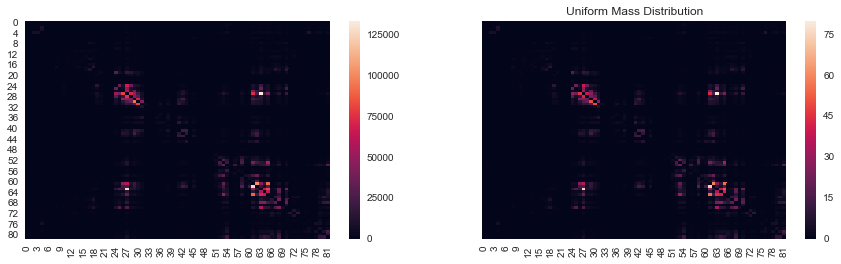

In [52]:
fig,axn = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_figwidth(15)
plt.title('Original Mass Distribution')
sns.heatmap(odm, ax=axn.flat[0])
plt.title('Uniform Mass Distribution')
sns.heatmap(u_odm, ax=axn.flat[1])

plt.show()

### 1.2 Levels

#### 1.2.1 Level 1

In [53]:
eps_1 = h.epsilon(1)


  2%|▏         | 140/6061 [00:05<03:39, 27.03it/s]Exception in thread Thread-4:
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration
100%|██████████| 6061/6061 [03:07<00:00, 32.27it/s]
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


NameError: name 'u_h' is not defined

In [62]:
u_eps_1 = uh.epsilon(1)

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


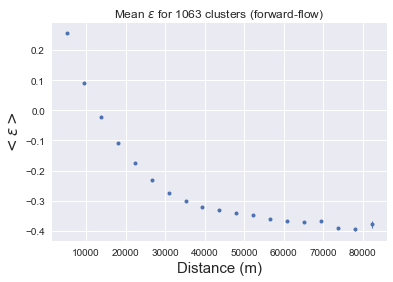

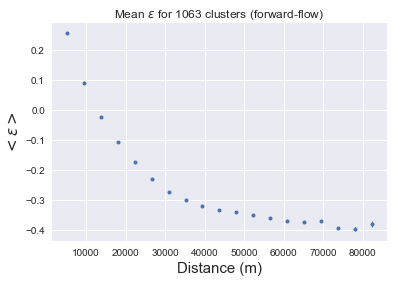

In [68]:
DM = h.cluster_population(h.levels[0]).DM
eps_distance(eps_1, DM, N)
eps_distance(u_eps_1, DM, N)

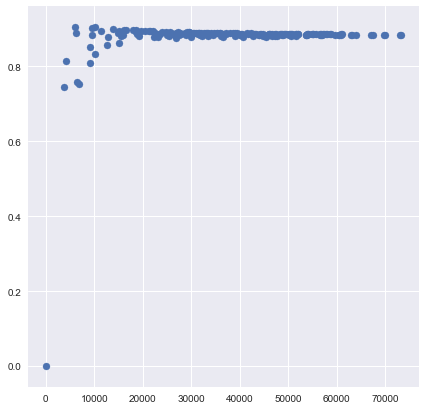

In [49]:
plt.figure(figsize=(width, height))
x = eps_scale.cluster_population(level_1).DM[10][1:] #distance of location 20 with all the others
y = eps_level_1[10][1:]
plt.scatter(x, y)
plt.show()

In [55]:
u_DM = uh.cluster_population(uh.levels[0]).DM
u_eps_distance(u_eps_1, DM, N)

NameError: name 'u_eps_distance' is not defined

Something weird here, it looks exactly the same as before. 

Is it actually independent of masses? Or are we doing something wrong? Maybe we can have a look at the ODMs to get a better idea.

#### 1.2.2 Level 2

In [50]:
eps_level_2 = eps_scale.epsilon(levels, 2, gamma)

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


In [51]:
width = 7
height = 7
plt.figure(figsize=(width, height))
x = eps_scale.cluster_population(level_2).DM[100][1:] #distance of location 20 with all the others
y = eps_level_2[100][1:]
plt.ylim(0.001, 0.004)
plt.scatter(x, y)
plt.show()

IndexError: index 100 is out of bounds for axis 0 with size 82

Looks the same here, too. Let's have a look at the ODMs then.